In [2]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel("Fortune500_2023.xlsx")
df

,Company,Rank,CEO_sex,Executive_men,Executive_women,Chairman_sex,Board_men,Board_women,Country,website
0,Walmart,1,men,6,3,men,8.0,3.0,USA,https://www.walmart.com/
1,Saudi Aramco,2,men,9,0,men,10.0,1.0,Saudi,https://www.aramco.com/
2,State Grid,3,men,7,1,NaN,NaN,NaN,China,http://www.sgcc.com.cn/
3,Amazon,4,men,6,1,men,7.0,5.0,USA,https://www.amazon.com/
4,China National Petroleum,5,men,8,0,men,NaN,NaN,China,https://www.cnpc.com.cn/
5,Sinopec Group,6,men,8,0,men,NaN,NaN,China,http://www.sinopecgroup.com/
6,Exxon Mobil,7,men,4,1,men,8.0,3.0,USA,https://exxonmobil.com/
7,Apple,8,men,14,6,men,4.0,4.0,USA,https://www.apple.com/
8,Shell,9,men,3,4,men,7.0,6.0,United Kingdom,https://www.shell.com/
9,UnitedHealth Group,10,men,18,10,men,7.0,3.0,USA,https://www.unitedhealthgroup.com/


In [4]:
df1=df[['Company','Executive_men','Executive_women']]
df.groupby('Country').mean('Executive_men')

,Rank,Executive_men,Executive_women,Board_men,Board_women
Country,,,,,
China,4.666667,7.666667,0.333333,NaN,NaN
Saudi,2.000000,9.000000,0.000000,10.0,1.0
USA,6.000000,9.600000,4.200000,6.8,3.6
United Kingdom,9.000000,3.000000,4.000000,7.0,6.0


In [5]:
df2=df[['Country','Executive_men','Executive_women']].groupby('Country').sum()
df2=df2.reset_index()
df2

,Country,Executive_men,Executive_women
0,China,23,1
1,Saudi,9,0
2,USA,48,21
3,United Kingdom,3,4


In [6]:
# Add a row of total values
df2.loc[len(df2)] = ['Global',df2.Executive_men.sum(),df2.Executive_women.sum()]
# df2=df2.set_index('Country')
df2

,Country,Executive_men,Executive_women
0,China,23,1
1,Saudi,9,0
2,USA,48,21
3,United Kingdom,3,4
4,Global,83,26


Text(0.1, -0.06, "Source: Graphic and data compiled by Raulin Cadet, using information from \nthe companies' websites.")

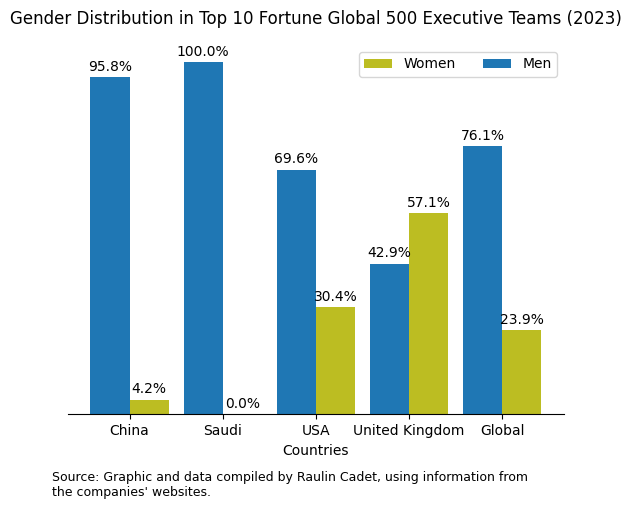

In [7]:
fig, ax = plt.subplots()
widthbars=0.42
x_men = df2.index - widthbars/2
x_women = df2.index + widthbars/2


ax.bar(x_women, df2['Executive_women']/(df2['Executive_women']+df2['Executive_men']), width=widthbars, label="Women",color='tab:olive')
ax.bar(x_men, df2['Executive_men']/(df2['Executive_women']+df2['Executive_men']), width=widthbars, label="Men",color='tab:blue')
plt.legend(loc='upper center', ncol=2)

# set the x-axis ticks and labels
ax.set_xticks(range(0, len(df2)))          # xaxis range
ax.set_yticks([])                          # remove yaxix, since labels appear on the bars.
ax.set_xticklabels(df2['Country'])         # xaxis labels which are countries names.

# Adding labels on bars
for i, (women, men) in enumerate(zip(df2['Executive_women'], df2['Executive_men'])):
    ax.text(x_women[i], women/(women+men)+0.01, f"{round(women/(women+men)*100,1)}"+'%', ha='center', va='bottom')
    ax.text(x_men[i], men/(women+men)+0.01, f"{round(men/(women+men)*100,1)}"+'%', ha='center', va='bottom')


ax.set_xlabel('Countries')   
# ax.set_ylabel('Percent')
ax.set_title('Gender Distribution in Top 10 Fortune Global 500 Executive Teams (2023)',pad=15)  
plt.legend(loc='upper right', ncol=2)       # add legend upper, but on the right corner
ax.spines[['top','right','left']].set_visible(False) 
fig.text(0.1, -0.06, "Source: Graphic and data compiled by Raulin Cadet, using information from \nthe companies' websites.",  
 ha='left',fontsize=9)

In [8]:
df2

,Country,Executive_men,Executive_women
0,China,23,1
1,Saudi,9,0
2,USA,48,21
3,United Kingdom,3,4
4,Global,83,26
